In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score
%matplotlib inline

In [4]:
data = load_boston()
data.data[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [6]:
X, y = shuffle(data.data, data.target, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=400, random_state=7)
model.fit(X, y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=400, random_state=7)

In [8]:
y_pred = model.predict(X_test)
y_pred

array([17.4758427 , 20.43888889, 28.04508671, 30.21428571, 24.66756757,
       18.45828571, 14.77914439, 17.06233184, 31.45967742, 25.38536585,
       20.45229682, 19.40234742, 21.81290323, 50.        , 10.23255814,
       17.78484848, 32.3531746 , 25.15614035, 17.38333333, 29.82797619,
       17.8       , 20.42643678, 30.55232558, 19.62919708, 22.24271357,
       15.93013699, 24.69516129, 23.37294118, 19.94468085, 20.44379845,
       16.26741573, 46.21071429, 11.76      , 50.        , 43.54411765,
       10.96470588, 24.81764706, 23.15098039, 25.89440559, 19.80677966,
       17.81982759, 23.28232759, 17.4758427 , 24.5625    , 16.90866142,
       29.85      , 46.68297872, 40.08367347, 19.38235294,  9.78108108,
       20.8115942 , 21.22733813, 17.17222222, 33.6940678 , 20.55862069,
       16.46422018, 16.32912621, 19.64496644, 25.18923077, 24.27375   ,
       26.91960784, 19.54590164, 14.41145833, 19.608     , 12.07777778,
       33.50338983, 11.98133333, 15.59      , 19.63189655, 15.08

In [9]:
mean_squared_error(y_test, y_pred)

4.975914320680744

In [10]:
explained_variance_score(y_test, y_pred)

0.9501525992447127

In [14]:
feature_importances = model.feature_importances_
feature_importances

array([0.03797442, 0.00259041, 0.00815527, 0.00126041, 0.04104033,
       0.24440274, 0.01340283, 0.11950682, 0.02384507, 0.05290524,
       0.04562835, 0.02088963, 0.38839849])

In [39]:
normalized_feature_importances = 100 * (feature_importances / max(feature_importances))
normalized_feature_importances

array([  9.77717891,   0.66694548,   2.09971725,   0.32451361,
        10.56655327,  62.92576938,   3.4507927 ,  30.76912519,
         6.13933178,  13.62138179,  11.74781897,   5.37840042,
       100.        ])

<AxesSubplot:>

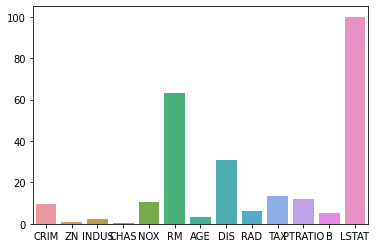

In [40]:
sns.barplot(x=data.feature_names, y=normalized_feature_importances)